## Introduction:

On September 27 1994 the ferry Estonia set sail on a night voyage across the Baltic Sea carrying 989 passengers and crew but sadely the Estonia never arrived.

The weather was typically stormy for the time of year but, At roughly 01:00 a worrying sound of screeching metal was heard, The ship suddenly listed 15 minutes later and soon alarms were sounding,  Shortly afterwards the Estonia rolled drastically to starboard. A Mayday signal was sent but power failure meant the ship’s position was given imprecisely. The Estonia disappeared from the responding ships’ radar screens at about 01:50.

The final death toll was shockingly high – more than 850 people.

The sinking of the Estonia was Europe’s worst postwar maritime disaster.

## Problem Definition

The problem here will be Binary Classification, Given data about passeneger can we predict whether they lived or died


## Data 
The dataset contains the name, age, sex, category and fate of the 989 passengers aboard the Estonia on the night of the sinking.


## Data Dictionary

* Country - Country of origin
* Firstname - Firstname of passenger
* Lastname - Lastname of passenger
* Sex - Gender of passenger - M = Male, F = Female
* Age - Age of passenger
* Category - The type of passenger - C = Crew, P = Passenger
* Survived - 0 = No, 1 = Yes

## Evaluation

The death toll of the Estonia disaster is well above 80%. If we were to make a naive baseline classifier that simply assumed all passengers aboard the Estonia died, it would be right about 86% of the time. Can you make a more sophisticated classifier that beats the baseline? (>85%) 

In [201]:
# Prepare required tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



### Lets take a look on our dataset


In [114]:
# read CSV file

estonia = pd.read_csv ("estonia-passenger-list.csv")
estonia.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [73]:
estonia.tail()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,F,60,P,0
985,986,Sweden,ELMAR MIKAEL,OUN,M,34,P,1
986,987,Sweden,ENN,QUNAPUU,M,77,P,0
987,988,Sweden,LY,GUNAPUU,F,87,P,0
988,989,Sweden,CARL,OVBERG,M,42,P,1


In [74]:
estonia["Country"].value_counts()

Sweden           550
Estonia          344
Latvia            28
Finland           16
Russia            14
Norway             9
Germany            8
Denmark            6
Lithuania          4
Morocco            2
Great Britain      2
Netherlands        2
France             1
Belarus            1
Nigeria            1
Canada             1
Name: Country, dtype: int64

In [75]:
estonia["Category"].value_counts()

P    796
C    193
Name: Category, dtype: int64

In [76]:
estonia.Sex.value_counts()

M    503
F    486
Name: Sex, dtype: int64

In [77]:
# EDA _ Exploratory Data Analysis

estonia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 42.6+ KB


In [78]:
# check for any null features
estonia.isna().sum()

PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

In [79]:
# describe dataset
estonia.describe()

,PassengerId,Age,Survived
count,989.000000,989.000000,989.000000
mean,494.992922,44.575329,0.138524
std,285.643660,17.235146,0.345624
min,1.000000,0.000000,0.000000
25%,248.000000,30.000000,0.000000
50%,495.000000,44.000000,0.000000
75%,742.000000,59.000000,0.000000
max,989.000000,87.000000,1.000000


In [80]:
# how many (survived = 1) and how many (did not survive = 0) 
estonia["Survived"].value_counts()

0    852
1    137
Name: Survived, dtype: int64

* The Dataset consist of 8 columns (3 numerical - 5 categorical)
* There is no null/empty features
* 90% of passenger were from (Sweden/Estonia)
* Crew memeber were 193, Passengers were 796 
* 503 Males and 486 Females were on board
* 852 Did not survive and 137 survived 

### Lets dive more into our dataset and get more info about survivals

In [14]:
estonia.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [16]:
pd.crosstab(estonia.Sex, estonia.Survived)

Survived,0,1
Sex,,
F,459,27
M,393,110


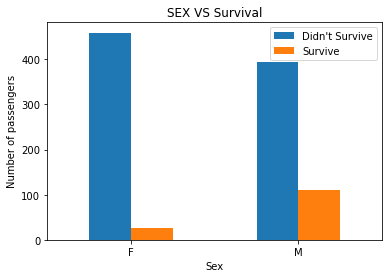

In [21]:
pd.crosstab(estonia.Sex, estonia.Survived).plot.bar()
plt.title ("SEX VS Survival")
plt.ylabel ("Number of passengers")
plt.xticks (rotation = 0)
plt.legend (["Didn't Survive", "Survive"]);

In [17]:
pd.crosstab(estonia.Category, estonia.Survived)

Survived,0,1
Category,,
C,154,39
P,698,98


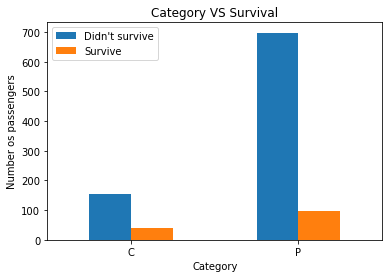

In [23]:
pd.crosstab(estonia.Category, estonia.Survived).plot.bar()
plt.title ("Category VS Survival")
plt.ylabel ("Number os passengers")
plt.xticks (rotation = 0)
plt.legend (["Didn't survive", "Survive"]);

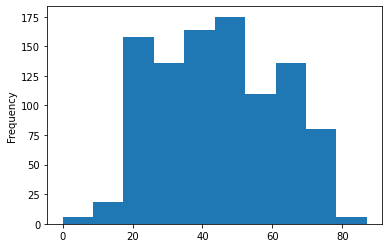

In [34]:
estonia.Age.plot.hist();

### we notice Age distribution is between 20 to 70 years old, younger and older than these ages can be neglected 

Text(0.5, 0, 'Age')

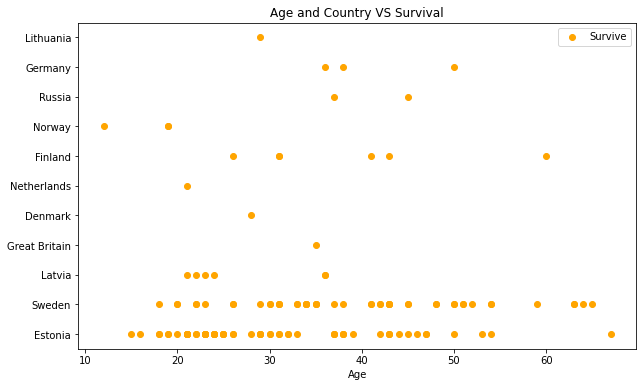

In [37]:
plt.figure (figsize = (10, 6))
plt.scatter (estonia.Age[estonia.Survived ==1],
             estonia.Country[estonia.Survived ==1],
             c = "orange")
plt.title ("Age and Country VS Survival")
plt.legend (["Survive"])
plt.xlabel ("Age")

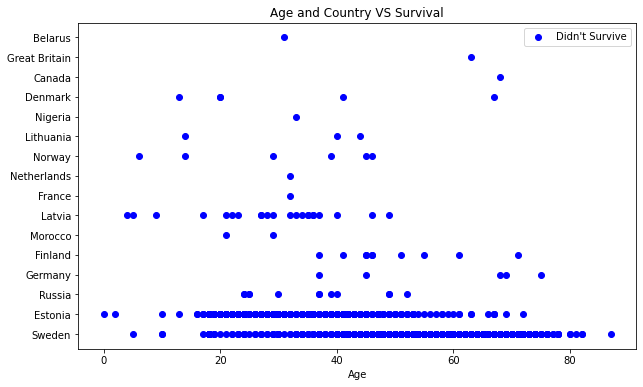

In [39]:
plt.figure (figsize = (10, 6))
plt.scatter (estonia.Age[estonia.Survived ==0],
             estonia.Country[estonia.Survived ==0],
             c = "blue")
plt.title ("Age and Country VS Survival")
plt.legend (["Didn't Survive"])
plt.xlabel ("Age");

In [81]:
estonia.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [115]:
# lets drop less important columns in our data set to prepare our correlation matrix
estonia.drop(["PassengerId", "Firstname", "Lastname", "Country"], axis=1,inplace = True)
estonia.head()

,Sex,Age,Category,Survived
0,M,62,P,0
1,F,22,C,0
2,F,21,C,0
3,M,53,C,0
4,F,55,P,0


### sex and Category we need to transform from categorical to numerical 
### (Sex - Male = 1, Female = 0)
### (Category - Passenger = 1 , Crew = 0)

In [116]:
estonia.head()

,Sex,Age,Category,Survived
0,M,62,P,0
1,F,22,C,0
2,F,21,C,0
3,M,53,C,0
4,F,55,P,0


In [117]:
change_dict = {"Sex" : {"M" : 1,
                        "F" : 0},
              "Category" : {"P" : 1,
                            "C" : 0}}

In [118]:
estonia.replace(change_dict, inplace = True)
estonia.head()

,Sex,Age,Category,Survived
0,1,62,1,0
1,0,22,0,0
2,0,21,0,0
3,1,53,0,0
4,0,55,1,0


In [105]:
#final_estonia = pd.get_dummies(estonia, columns=["Country"]).head()

### Finally we can get the correlation matrix now 

In [119]:
corr_matrix = estonia.corr()
corr_matrix

,Sex,Age,Category,Survived
Sex,1.000000,-0.053819,0.072258,0.236082
Age,-0.053819,1.000000,0.325096,-0.245832
Category,0.072258,0.325096,1.000000,-0.090583
Survived,0.236082,-0.245832,-0.090583,1.000000


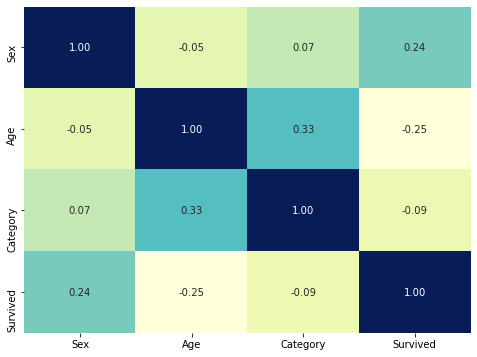

In [125]:
# lets make the correlation matrix more visual
fig, ax = plt.subplots(figsize = (8, 6))
plt.ax = (sns.heatmap(corr_matrix,
                      cmap = "YlGnBu",
                      cbar = False,
                      annot = True,
                      fmt = ".2f"))


The highest positive correlation with survival is the sex and the higest negative correlation with the survival is the age  

In [146]:
# To start modeling lets import the file again
estonia = pd.read_csv("estonia-passenger-list.csv")
estonia.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [147]:
# drop less important columns 
estonia.drop(["PassengerId", "Firstname", "Lastname"], axis = 1, inplace = True)
estonia.head()

,Country,Sex,Age,Category,Survived
0,Sweden,M,62,P,0
1,Estonia,F,22,C,0
2,Estonia,F,21,C,0
3,Sweden,M,53,C,0
4,Sweden,F,55,P,0


In [148]:
# Change Sex and Category to numirical values

change_dict = {"Sex": {"M": 1,
                       "F": 0},
               "Category" : {"P": 1,
                              "C": 0}}
estonia.replace(change_dict, inplace =True)


In [149]:
estonia.head()

,Country,Sex,Age,Category,Survived
0,Sweden,1,62,1,0
1,Estonia,0,22,0,0
2,Estonia,0,21,0,0
3,Sweden,1,53,0,0
4,Sweden,0,55,1,0


In [151]:
# Lets change Country categorical data to numirical
num_estonia = pd.get_dummies (estonia, columns = ["Country"])
num_estonia.head()

,Sex,Age,Category,Survived,Country_Belarus,Country_Canada,Country_Denmark,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Great Britain,Country_Latvia,Country_Lithuania,Country_Morocco,Country_Netherlands,Country_Nigeria,Country_Norway,Country_Russia,Country_Sweden
0,1,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,22,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [152]:
# keep all featires as X and target as y
X = num_estonia.drop("Survived", axis = 1)
y = num_estonia["Survived"]

In [153]:
X

,Sex,Age,Category,Country_Belarus,Country_Canada,Country_Denmark,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Great Britain,Country_Latvia,Country_Lithuania,Country_Morocco,Country_Netherlands,Country_Nigeria,Country_Norway,Country_Russia,Country_Sweden
0,1,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,21,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,0,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
985,1,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
986,1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
987,0,87,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [154]:
y

0      0
1      0
2      0
3      0
4      0
      ..
984    0
985    1
986    0
987    0
988    1
Name: Survived, Length: 989, dtype: int64

In [156]:
# split data to train and test 
np.random.seed (99)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

In [237]:
# we are going to be testing on four models

models = {"Ridge classifier" : RidgeClassifier(),
          "Logistic Regressor" : LogisticRegression(),
          "Random Forest" : RandomForestClassifier(),
          "KNN" : KNeighborsClassifier()}
def fit_and_score(models, X_train, X_test, y_train, y_test):
    models_score = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        models_score[name] = model.score(X_test, y_test)
    return models_score
        

In [161]:
models_score = fit_and_score(models, X_train, X_test, y_train, y_test)
models_score

C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Ridge classifier': 0.8888888888888888,
 'Logistic Regressor': 0.8838383838383839,
 'Random Forest': 0.8686868686868687,
 'KNN': 0.8787878787878788}

In [232]:
# check prediction of the models

np.random.seed(99)
# Ridge model confusion matrix
ridge_clf = RidgeClassifier()
ridge_clf.fit(X_train, y_train)
ridge_clf.score(X_test, y_test)
ridge_y_preds = ridge_clf.predict (X_test)
ridge_conf_matrix = confusion_matrix(y_test, ridge_y_preds)


In [234]:
print (ridge_conf_matrix)

[[176   0]
 [ 22   0]]


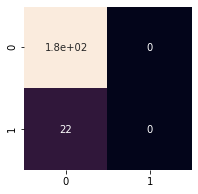

In [239]:
# lets make the confusion matrix more visual 

fig, ax = plt.subplots(figsize = (3,3))
ax = sns.heatmap(ridge_conf_matrix,
                 annot = True,
                 cbar = False)
plt.xlabel = ("True Labels")
plt.ylabel = ("Predicted labels")


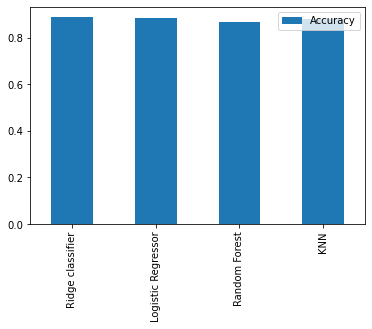

In [164]:
# Compare our models visualy
compare_models = pd.DataFrame(models_score, index = ["Accuracy"])
compare_models.T.plot.bar();

### Notice all four models are almost equal in Accuracy lets try hyperprameters tuning for all the models to find which model is the best

In [236]:
# Use RandomSearchCV for hyperparameters tuning
# Create search grid for each model

rs_models = {"Ridge classifier" : RidgeClassifier(),
          "KNN" : KNeighborsClassifier()}

ridge_grid = {"alpha" : np.arange(1, 100, 5)}
knn_grid = {"n_neighbors" : np.arange(1, 100, 5)}
log_grid = {"solver" : ["liblinear", "sag", "saga"],
            "C" : np.logspace(-4, 4, 20)}
rf_grid = {"n_estimators" : np.arange(10, 1000, 120),
           "max_depth" : ["None", 2, 3, 5],
           "min_samples_leaf" : np.arange(1, 20, 2)}


grids = {"ridge_grid" : {"alpha" : np.arange(1, 100, 5)},
         "knn_grid" : {"n_neighbors" : np.arange(1, 100, 5)}}

# Randomized Search CV
np.random.seed(99)
rs_model = RandomizedSearchCV (estimator = for value in rs_models.values(),
                               param_distributions = for value in grids.values(),
                               cv = 5,
                               n_iter = 20,
                               verbose = True)
rs_model.fit(X_train, y_train)

SyntaxError: invalid syntax (<ipython-input-236-ef17af366391>, line 21)

In [181]:
rs_ridge.best_params_

{'alpha': 6}

In [182]:
rs_ridge.score(X_test, y_test)

0.8888888888888888

In [184]:
# Logistic Regressor Randomized Search CV
np.random.seed(99)
rs_log = RandomizedSearchCV (estimator = LogisticRegression(),
                               param_distributions = log_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)
rs_log.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\users\lenovo\ztm

C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarn

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'sag', 'saga']},
                   verbose=True)

In [185]:
rs_log.best_params_

{'solver': 'sag', 'C': 0.0006951927961775605}

In [186]:
np.random.seed(99)
rs_log.score(X_test, y_test) 

0.8888888888888888

In [189]:
# Random Classifier Randomized Search CV
np.random.seed(99)
rs_rc = RandomizedSearchCV (estimator = RandomForestClassifier(),
                               param_distributions = rf_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)
rs_rc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\users\lenovo\ztm\p

C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job

C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job

C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job

C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job

C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job

C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\users\lenovo\ztm\projects\env\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': ['None', 2, 3, 5],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10, 130, 250, 370, 490, 610, 730, 850, 970])},
                   verbose=True)

In [191]:
rs_rc.best_params_

{'n_estimators': 10, 'min_samples_leaf': 11, 'max_depth': 5}

In [192]:
rs_rc.score(X_test, y_test)

0.8888888888888888

In [193]:
# Random Classifier Randomized Search CV
np.random.seed(99)
rs_knn = RandomizedSearchCV (estimator = KNeighborsClassifier(),
                               param_distributions = knn_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)
rs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
                   verbose=True)

In [194]:
rs_knn.best_params_

{'n_neighbors': 26}

In [195]:
rs_knn.score(X_test, y_test)

0.8888888888888888